<a href="https://colab.research.google.com/github/waiman115/DATA-342/blob/main/DATA_342_Fall_2025_Lab_3_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Lab 1**: Using Descriptive Statistics to Evaluate Daily Returns between Walmart and Costco



Step 1: Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Step 2: Install Required Libraries

In [ ]:
!pip install openpyxl matplotlib pandas

Step 3: Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

Step 4: Load the Excel File


In [ ]:
import requests
import pandas as pd

file_id = '15BZjxeCbHQSN4XQB1BOrLNQiFJuECQ0U'
url = f'https://docs.google.com/spreadsheets/d/15BZjxeCbHQSN4XQB1BOrLNQiFJuECQ0U/export?format=xlsx'
response = requests.get(url)

if response.status_code == 200:
    with open('DATA 342 Fall 2025 Lab 1 Data 2.xlsx', 'wb') as f:
        f.write(response.content)
    df = pd.read_excel('DATA 342 Fall 2025 Lab 1 Data 2.xlsx', sheet_name='Daily Returns 2024', engine='openpyxl')
else:
    print(f"Error downloading file: {response.status_code}")

Step 5: Display Sample Rows

In [ ]:
print("Sample rows from the dataset:")
print(df.head())

Sample rows from the dataset:
        Date Ticker  Adj Close  Daily Return
0 2024-01-02   TSLA     248.42           NaN
1 2024-01-03   TSLA     238.45     -0.040134
2 2024-01-04   TSLA     237.93     -0.002181
3 2024-01-05   TSLA     237.49     -0.001849
4 2024-01-08   TSLA     240.45      0.012464


Step 6: Clean and Format the Data


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.dropna(subset=['Daily Return'])  # Remove rows with missing returns

Step 7: Separate Walmart and COST Data

In [ ]:
tsla_df = df[df['Ticker'] == 'TSLA'].copy()
amd_df = df[df['Ticker'] == 'AMD'].copy()

Step 8: Display Sample Rows

In [ ]:
print("\nTSLA Daily Returns:")
print(tsla_df[['Date', 'Adj Close', 'Daily Return']].head())

print("\nAMD Daily Returns:")
print(amd_df[['Date', 'Adj Close', 'Daily Return']].head())


TSLA Daily Returns:
        Date  Adj Close  Daily Return
1 2024-01-03     238.45     -0.040134
2 2024-01-04     237.93     -0.002181
3 2024-01-05     237.49     -0.001849
4 2024-01-08     240.45      0.012464
5 2024-01-09     234.96     -0.022832

AMD Daily Returns:
          Date  Adj Close  Daily Return
252 2024-01-03     135.32     -0.023524
253 2024-01-04     136.01      0.005099
254 2024-01-05     138.58      0.018896
255 2024-01-08     146.18      0.054842
256 2024-01-09     149.26      0.021070


Step 9: Visualize Daily Returns with Box and Whisker Plots

/tmp/ipython-input-825454987.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([tsla_df['Daily Return'], amd_df['Daily Return']], labels=['TSLA', 'AMD'])


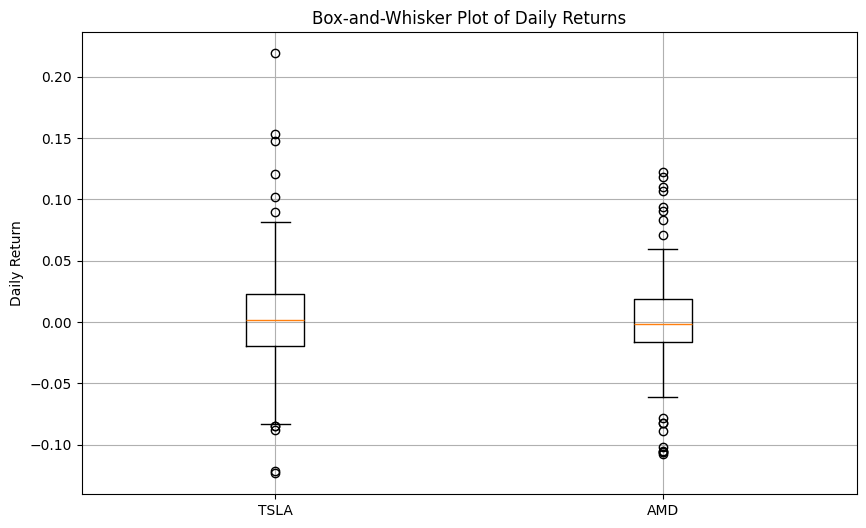

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot([tsla_df['Daily Return'], amd_df['Daily Return']], labels=['TSLA', 'AMD'])
plt.title('Box-and-Whisker Plot of Daily Returns')
plt.ylabel('Daily Return')
plt.grid(True)
plt.show()

**Next Steps**

Once you have successfully run your code in Google Colab for your selected companies, take screenshots that show both your code and the output. After that, adjust your code for it to run in  Python on your local machine.

**Note**: Review the provided python file DATA_342_Fall_2025_Lab_1_idle_ready.py

In [ ]:
from scipy import stats

def descriptive_stats(series):
    return {
        'Mean': series.mean(),
        'Median': series.median(),
        'Mode': series.mode().iloc[0] if not series.mode().empty else None,
        'Standard Deviation': series.std(),
        'Sample Variance': series.var(),
        'Kurtosis': series.kurtosis(),
        'Skewness': series.skew(),
        'Range': series.max() - series.min(),
        'Minimum': series.min(),
        'Maximum': series.max()
    }

# Compute descriptive statistics
tsla_stats = descriptive_stats(tsla_df['Daily Return'])
amd_stats = descriptive_stats(amd_df['Daily Return'])

print("\nDescriptive Statistics for TSLA (TSLA):")
for key, value in tsla_stats.items():
    print(f"{key}: {value}")

print("\nDescriptive Statistics for AMD (AMD):")
for key, value in amd_stats.items():
    print(f"{key}: {value}")


Descriptive Statistics for TSLA (TSLA):
Mean: 0.0028616134446880653
Median: 0.001389553825422607
Mode: -0.12334605081581296
Standard Deviation: 0.04009599879153909
Sample Variance: 0.0016076891190911042
Kurtosis: 4.493407460938716
Skewness: 0.8853608585317683
Range: 0.34253631526701833
Minimum: -0.12334605081581296
Maximum: 0.21919026445120537

Descriptive Statistics for AMD (AMD):
Mean: 0.0005752999330644094
Median: -0.0013150312738687275
Mode: -0.1079249589842356
Standard Deviation: 0.034891752547536285
Sample Variance: 0.0012174343958385049
Kurtosis: 2.3598896800492906
Skewness: 0.03457994289041112
Range: 0.23059728828838455
Minimum: -0.1079249589842356
Maximum: 0.12267232930414895


In [ ]:
# Hypothesis Testing: Independent t-test
t_stat, p_value = stats.ttest_ind(tsla_df['Daily Return'], amd_df['Daily Return'], equal_var=False)
print("\nHypothesis Testing (Independent t-test):")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")


Hypothesis Testing (Independent t-test):
T-statistic: 0.6824419593095683
P-value: 0.4952817597249496


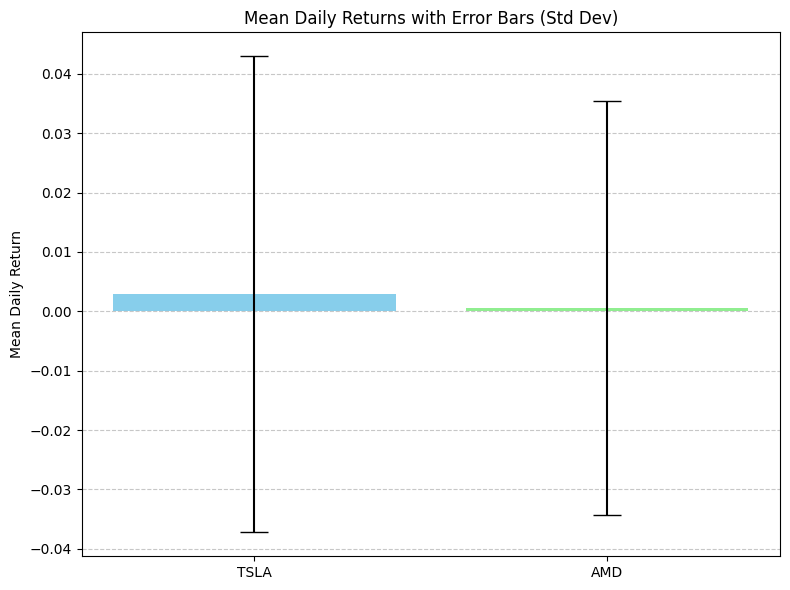

In [ ]:
!pip install pandas matplotlib openpyxl scipy
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Compute mean and standard deviation for error bars
mean_wmt = tsla_df['Daily Return'].mean()
std_wmt = tsla_df['Daily Return'].std()
mean_cost = amd_df['Daily Return'].mean()
std_cost = amd_df['Daily Return'].std()

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(tsla_df['Daily Return'], amd_df['Daily Return'], equal_var=False)

# Create bar plot with error bars
means = [mean_wmt, mean_cost]
errors = [std_wmt, std_cost]
labels = ['TSLA', 'AMD']
colors = ['skyblue', 'lightgreen']

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, means, yerr=errors, capsize=10, color=colors)

# Add asterisk if p-value < 0.05
if p_value < 0.05:
    max_height = max(means)
    y = max_height + max(errors) + 0.005
    plt.plot([0, 1], [y, y], color='black')
    plt.text(0.5, y + 0.002, '*', ha='center', va='bottom', fontsize=20)

# Customize plot
plt.title('Mean Daily Returns with Error Bars (Std Dev)')
plt.ylabel('Mean Daily Return')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Filter Q1 2024 data
q1_2024_df = df[(df['Date'] >= '2024-01-01') & (df['Date'] <= '2024-03-31')].copy()
q1_2024_df = q1_2024_df.sort_values('Date')
q1_2024_df['DayIndex'] = np.arange(len(q1_2024_df))

# Separate TSLA and AMD Data
tsla_2024 = q1_2024_df[q1_2024_df['Ticker'] == 'TSLA'].copy()
amd_2024 = q1_2024_df[q1_2024_df['Ticker'] == 'AMD'].copy()


===== TSLA Regression Summary =====
                            OLS Regression Results                            
Dep. Variable:         Q("Adj Close")   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     129.0
Date:                Tue, 11 Nov 2025   Prob (F-statistic):           2.25e-16
Time:                        07:55:56   Log-Likelihood:                -230.02
No. Observations:                  60   AIC:                             464.0
Df Residuals:                      58   BIC:                             468.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    22

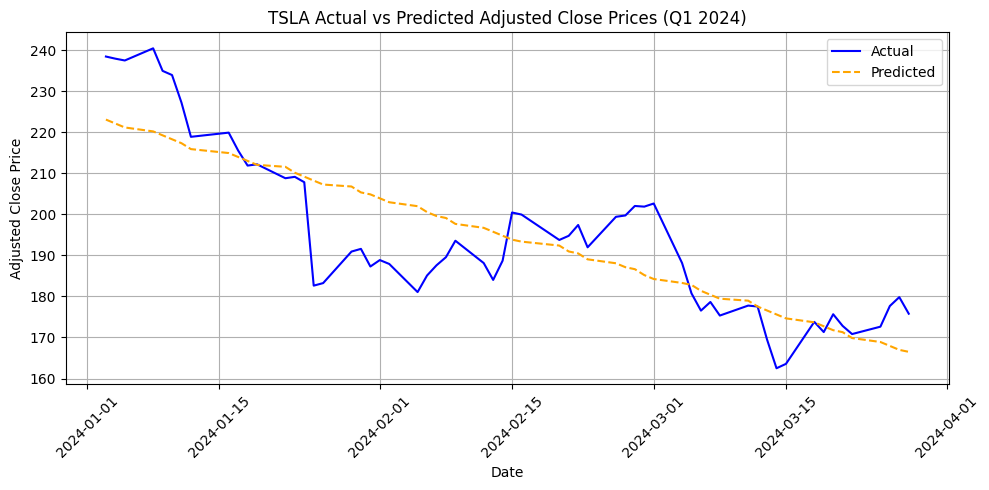

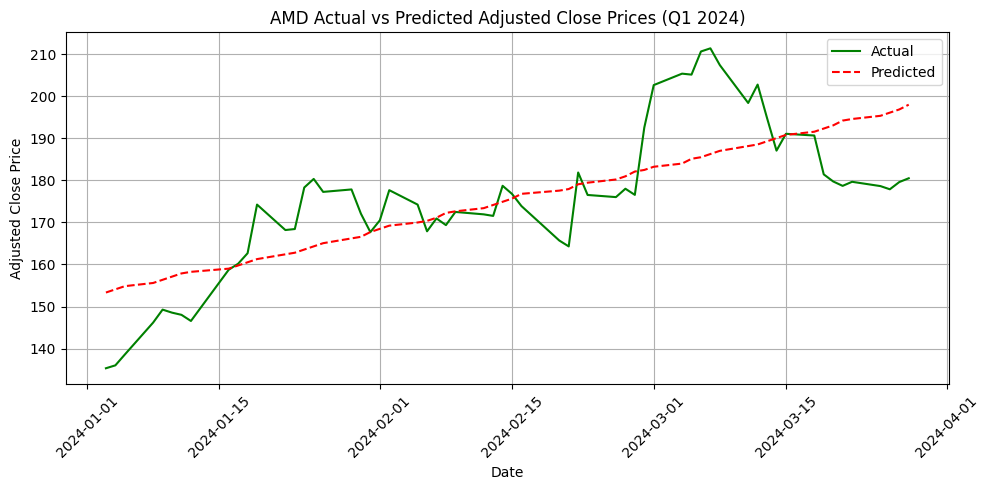

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

# Regression function with additional metrics
def perform_regression(data, company_name):
    # Using statsmodels for more robust statistical metrics
    # Note: statsmodels OLS requires a constant term for the intercept, which it adds by default
    # We need to ensure the column names are valid for formula API, hence Q("Adj Close")
    model_sm = smf.ols(formula='Q("Adj Close") ~ DayIndex', data=data).fit()

    print(f"\n===== {company_name} Regression Summary =====")
    print(model_sm.summary())  # Includes R², Adjusted R², F-statistic, p-values, confidence intervals

    # ANOVA table
    anova_table = sm.stats.anova_lm(model_sm, typ=2)
    print("\nANOVA Table:")
    print(anova_table)

    # Metrics from statsmodels summary
    r_square = model_sm.rsquared
    adjusted_r_square = model_sm.rsquared_adj
    multiple_r = np.sqrt(r_square) # Typically sqrt(R-squared) for simple linear regression

    # Standard Error of the regression (Residual Standard Error)
    # This is np.sqrt(model_sm.mse_resid)
    standard_error = np.sqrt(model_sm.mse_resid)

    # Use sklearn for predictions and RMSE calculation for consistency
    X = data[['DayIndex']]
    y = data['Adj Close']
    model_sk = LinearRegression()
    model_sk.fit(X, y)
    y_pred = model_sk.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))

    # Add predictions to data
    data['Predicted'] = y_pred

    metrics = {
        'Multiple R': multiple_r,
        'R Square': r_square,
        'Adjusted R Square': adjusted_r_square,
        'Standard Error': standard_error,
        'RMSE': rmse
    }

    return model_sk, data, metrics # Return sklearn model for consistent prediction method

# Run regression for both companies
tsla_model, tsla_2024_with_predictions, tsla_metrics = perform_regression(tsla_2024, 'TSLA')
amd_model, amd_2024_with_predictions, amd_metrics = perform_regression(amd_2024, 'AMD')

# Print metrics
print("TSLA Regression Metrics:")
for key, value in tsla_metrics.items():
    print(f"{key}: {value:.9f}") # Increased precision

print("\nAMD Regression Metrics:")
for key, value in amd_metrics.items():
    print(f"{key}: {value:.9f}") # Increased precision

# Plot TSLA actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(tsla_2024_with_predictions['Date'], tsla_2024_with_predictions['Adj Close'], label='Actual', color='blue')
plt.plot(tsla_2024_with_predictions['Date'], tsla_2024_with_predictions['Predicted'], label='Predicted', linestyle='--', color='orange')
plt.title('TSLA Actual vs Predicted Adjusted Close Prices (Q1 2024)')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot AMD actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(amd_2024_with_predictions['Date'], amd_2024_with_predictions['Adj Close'], label='Actual', color='green')
plt.plot(amd_2024_with_predictions['Date'], amd_2024_with_predictions['Predicted'], label='Predicted', linestyle='--', color='red')
plt.title('AMD Actual vs Predicted Adjusted Close Prices (Q1 2024)')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Forecasts exported successfully to Q1_2025_Forecasts.xlsx


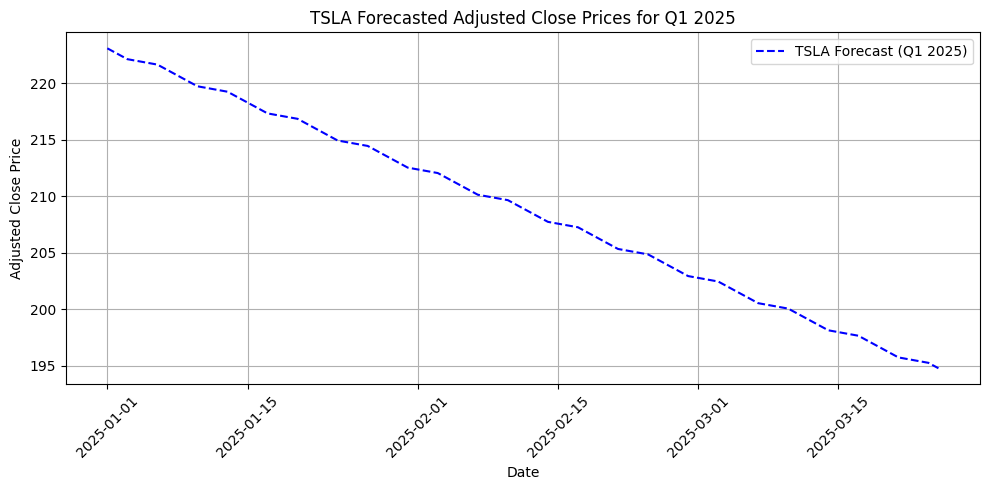

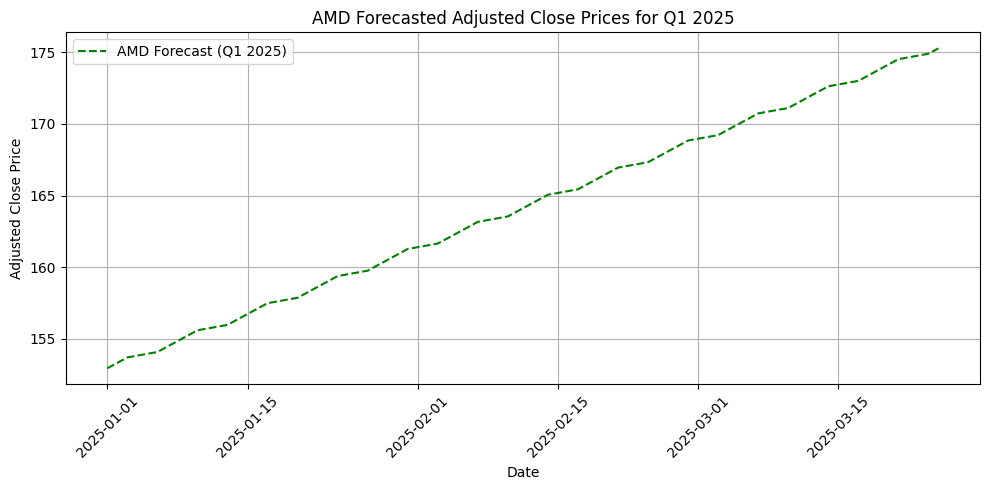

In [ ]:
# ARIMA Forecast Q1 2025
forecast_days = len(tsla_2024_with_predictions)
forecast_dates = pd.date_range(start='2025-01-01', periods=forecast_days, freq='B')
tsla_forecast = tsla_model.predict(np.arange(forecast_days).reshape(-1, 1))
amd_forecast = amd_model.predict(np.arange(forecast_days).reshape(-1, 1))

# Create forecast dataframes
tsla_forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted Adj Close': tsla_forecast})
amd_forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted Adj Close': amd_forecast})

# Export to Excel with two sheets
output_file = 'Q1_2025_Forecasts.xlsx'
with pd.ExcelWriter(output_file, engine='openpyxl') as writer:
    tsla_forecast_df.to_excel(writer, sheet_name='TSLA Forecast', index=False)
    amd_forecast_df.to_excel(writer, sheet_name='AMD Forecast', index=False)

print(f"Forecasts exported successfully to {output_file}")

# Plot TSLA forecast
plt.figure(figsize=(10, 5))
plt.plot(forecast_dates, tsla_forecast, label='TSLA Forecast (Q1 2025)', linestyle='--', color='blue')
plt.title('TSLA Forecasted Adjusted Close Prices for Q1 2025')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot AMD forecast
plt.figure(figsize=(10, 5))
plt.plot(forecast_dates, amd_forecast, label='AMD Forecast (Q1 2025)', linestyle='--', color='green')
plt.title('AMD Forecasted Adjusted Close Prices for Q1 2025')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()